In [1]:
from nimare.meta.kernel import MKDAKernel
from nilearn.plotting import plot_stat_map

from braindec.preproc import _get_dataset

In [2]:
project_dir = "/Users/julioaperaza/Documents/GitHub/brain-decoder"

In [3]:
dset = _get_dataset("neurosynth", project_dir)

INFO:nimare.extract.utils:Dataset created in /Users/julioaperaza/Documents/GitHub/brain-decoder/neurosynth
INFO:nimare.extract.extract:Searching for any feature files matching the following criteria: [('source-abstract', 'vocab-terms', 'data-neurosynth', 'version-7')]


In [54]:
import os.path as op
import pickle
from braindec.preproc import MRIDataset

data_dir = op.join(project_dir, "data")
dataset_fn = op.join(data_dir, "dataset.pkl")

with open(dataset_fn, "rb") as f:
    dataset = pickle.load(f)

In [60]:
import numpy as np

print(np.unique(dataset.labels))

['action' 'actions' 'adaptation' 'affective' 'arousal' 'attention'
 'attentional' 'auditory' 'aversive' 'body' 'change' 'cognitive'
 'cognitive control' 'color' 'comprehension' 'conflict' 'context'
 'control' 'decision' 'default mode' 'disgust' 'dmn' 'emotion' 'emotional'
 'empathy' 'encoding' 'error' 'errors' 'executive' 'expressions'
 'extinction' 'face' 'faces' 'facial' 'fear' 'fearful' 'feedback' 'food'
 'gaze' 'hand' 'imagery' 'imitation' 'impulsivity' 'inhibition'
 'intrinsic' 'language' 'learning' 'load' 'loss' 'memory' 'mood' 'moral'
 'motion' 'motor' 'movement' 'movements' 'music' 'musical' 'naming'
 'negative' 'numerical' 'object' 'objects' 'olfactory' 'pain'
 'performance' 'personality' 'phonological' 'pictures' 'pitch' 'practice'
 'priming' 'reading' 'reasoning' 'recall' 'recognition' 'recollection'
 'regulation' 'repetition' 'response' 'response inhibition' 'responses'
 'resting' 'resting state' 'retrieval' 'reward' 'risk' 'rsfc' 'rule' 'sad'
 'search' 'self' 'semantic' 's

In [50]:
import torch.nn.functional as F
import torch
from sklearn.preprocessing import normalize

In [49]:
F.softmax(torch.from_numpy(dataset.soft_labels), dim=1)

tensor([[0.0079, 0.0079, 0.0079,  ..., 0.0079, 0.0079, 0.0109],
        [0.0079, 0.0079, 0.0079,  ..., 0.0079, 0.0079, 0.0079],
        [0.0080, 0.0080, 0.0080,  ..., 0.0080, 0.0080, 0.0080],
        ...,
        [0.0079, 0.0079, 0.0079,  ..., 0.0079, 0.0079, 0.0079],
        [0.0080, 0.0080, 0.0080,  ..., 0.0080, 0.0080, 0.0080],
        [0.0079, 0.0079, 0.0079,  ..., 0.0079, 0.0079, 0.0079]],
       dtype=torch.float64)

In [52]:
dataset.soft_labels

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.3204174],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [53]:
normalize(dataset.soft_labels, norm='l1', axis=1).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [29]:
import pandas as pd

classification_df = pd.read_csv("/Users/julioaperaza/Documents/GitHub/brain-decoder/data/neurosynth/source-neurosynth_desc-term3228_classification.csv")
functional_mask = (classification_df["Classification"] == "Functional").values

In [30]:
functional_df = dset.annotations.filter(like="terms_abstract_tfidf__").loc[:, functional_mask]

In [32]:
from collections import Counter

# Get the term with the highest value for each row
terms = functional_df.idxmax(axis=1).to_list()

# Assume df is your dataframe and terms is a list of terms
term_counts = Counter(terms)

# Step 1: Filter terms with count greater than 30
filtered_terms = [term for term, count in term_counts.items() if count > 30]

# Step 2: Filter the columns of the DataFrame that contain any of the filtered terms
filtered_columns = [col for col in functional_df.columns if col in filtered_terms]

# Step 3: Subset the dataframe to keep only those columns
filtered_df = functional_df[filtered_columns]

In [34]:
terms = filtered_df.idxmax(axis=1).to_list()

In [35]:
term_counts = Counter(terms)
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)
sorted_terms


[('terms_abstract_tfidf__motor', 386),
 ('terms_abstract_tfidf__pain', 355),
 ('terms_abstract_tfidf__memory', 314),
 ('terms_abstract_tfidf__social', 302),
 ('terms_abstract_tfidf__reward', 286),
 ('terms_abstract_tfidf__task', 284),
 ('terms_abstract_tfidf__resting state', 272),
 ('terms_abstract_tfidf__visual', 267),
 ('terms_abstract_tfidf__action', 261),
 ('terms_abstract_tfidf__language', 247),
 ('terms_abstract_tfidf__self', 247),
 ('terms_abstract_tfidf__speech', 247),
 ('terms_abstract_tfidf__learning', 237),
 ('terms_abstract_tfidf__attention', 235),
 ('terms_abstract_tfidf__emotional', 233),
 ('terms_abstract_tfidf__wm', 229),
 ('terms_abstract_tfidf__risk', 226),
 ('terms_abstract_tfidf__auditory', 225),
 ('terms_abstract_tfidf__cognitive', 223),
 ('terms_abstract_tfidf__dmn', 218),
 ('terms_abstract_tfidf__semantic', 207),
 ('terms_abstract_tfidf__spatial', 188),
 ('terms_abstract_tfidf__retrieval', 184),
 ('terms_abstract_tfidf__reading', 182),
 ('terms_abstract_tfidf__mo

In [12]:
kernel = MKDAKernel()
image_output = kernel.transform(dset, return_type="image")

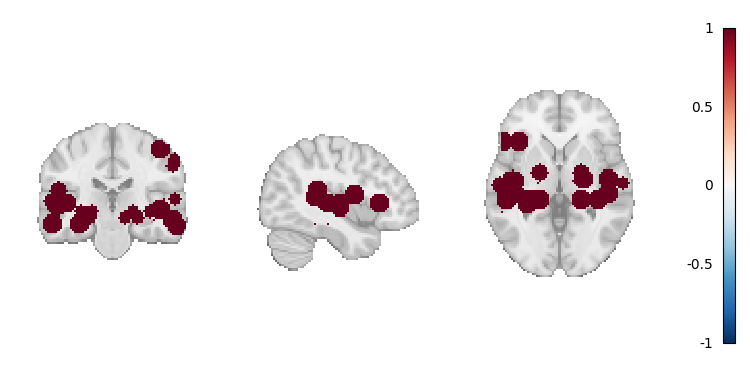

In [34]:
plot_stat_map(
    image_output[6],
    draw_cross=False,
    annotate=False,
    colorbar=True,
    cmap="RdBu_r",
    symmetric_cbar=True,
)

In [19]:
image_output[0].get_fdata().shape

(91, 109, 91)

In [36]:
import numpy as np

data = [img.get_fdata() for img in image_output]
np.array(data).shape

(14371, 91, 109, 91)

In [29]:
tfidf_columns = dset.annotations.filter(like='terms_abstract_tfidf__')
terms = tfidf_columns.idxmax(axis=1).to_list()

In [31]:
terms = [term.replace('terms_abstract_tfidf__', '') for term in terms]
terms

['capacity',
 'movement',
 'auditory',
 'cerebral',
 'bilinguals',
 'sii',
 'auditory',
 'orbitofrontal cortex',
 'sequential',
 'learning',
 'verbal fluency',
 'judgments',
 'color',
 'objects',
 'transient',
 'spatial attention',
 'delay',
 'adhd',
 'autism',
 'temporal sulcus',
 'episodic memory',
 'modality',
 'motivation',
 'eye',
 'cerebellar',
 'languages',
 'hemodynamic response',
 'novel',
 'flow',
 'face',
 'faces',
 'movement',
 'cue',
 'objects',
 'attention',
 'imagery',
 'saccades',
 'typical',
 'rhythm',
 'motion',
 'sentence',
 'canonical',
 'conditioning',
 'encoding',
 'pain',
 'mind',
 'dimensional',
 'faces',
 'power',
 'visual',
 'orbitofrontal',
 'bold',
 'visual',
 'et al',
 'mm',
 'retention',
 'encoding',
 'switching',
 'movement',
 'arithmetic',
 'movement',
 'rehearsal',
 'conscious',
 'auditory',
 'reductions',
 'attention',
 'motor',
 'depth',
 'wm',
 'response selection',
 'mirror',
 'generation',
 'identity',
 'recall',
 'feedback',
 'spatial attention',


In [32]:
from collections import Counter

term_counts = Counter(terms)
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

In [33]:
sorted_terms

[('pain', 237),
 ('speech', 127),
 ('reward', 124),
 ('wm', 114),
 ('schizophrenia', 111),
 ('social', 100),
 ('adhd', 92),
 ('asd', 90),
 ('pd', 88),
 ('self', 88),
 ('motion', 84),
 ('language', 83),
 ('learning', 81),
 ('face', 80),
 ('ptsd', 77),
 ('sleep', 74),
 ('reading', 74),
 ('dmn', 73),
 ('faces', 72),
 ('ad', 72),
 ('mdd', 72),
 ('training', 70),
 ('food', 63),
 ('ocd', 62),
 ('fc', 62),
 ('emotional', 60),
 ('stress', 60),
 ('action', 59),
 ('feedback', 58),
 ('eeg', 57),
 ('motor', 56),
 ('conflict', 56),
 ('connectivity', 55),
 ('reho', 53),
 ('children', 52),
 ('alcohol', 52),
 ('auditory', 51),
 ('memory', 51),
 ('semantic', 51),
 ('amygdala', 51),
 ('attention', 49),
 ('anxiety', 48),
 ('words', 47),
 ('risk', 47),
 ('imagery', 46),
 ('mci', 46),
 ('body', 45),
 ('visual', 44),
 ('ba', 44),
 ('moral', 44),
 ('alff', 44),
 ('movement', 42),
 ('retrieval', 41),
 ('fear', 40),
 ('threat', 40),
 ('encoding', 39),
 ('gm', 39),
 ('ms', 38),
 ('emotion', 38),
 ('empathy', 38